<a href="https://colab.research.google.com/github/BDZG10/IntArt.FIME/blob/main/AF6_Arbol_de_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Cargar librerías

In [5]:
# Actividad 6: Aprendizaje supervizado, árbol de decisión
# Equipo:
# N4 Cesar Ballin Rodriguez-2132117
# N4 Brandon Daniel Zavala Gaytan 2055952
# N4 Dylan Jesús Cuéllar Aranda 2042806
# N4 Letizia Isabel García Vargas 2056273
# N5 Erick Escárcega Esparza 2132268
import matplotlib.pyplot as plt  # Generar gráficos
from sklearn.model_selection import train_test_split  # Dividir datos en train/test
from sklearn.tree import DecisionTreeClassifier  # Modelo de árbol de decisión
from sklearn.metrics import accuracy_score, classification_report  # Evalúa modelos de clasificación
from sklearn import tree  # Visualización de árboles de decisión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Matriz de confusión
from sklearn.preprocessing import LabelEncoder  # Codificar etiquetas de texto a numéricas
import seaborn as sns  # Visualización de datos estadísticos
import numpy as np  # Generar arreglos
import pandas as pd  # Cargar datasets
from google.colab import drive # Carga de dataset por Drive
drive.mount('/content/drive')
dataset = "/content/drive/MyDrive/Colab Notebooks/breast_cancer.csv"
data = pd.read_csv(dataset)  # Carga el dataset

Mounted at /content/drive


2. Cargar datos

In [6]:
X = data.drop(columns=['id', 'diagnosis']).values # Data a entrenar (todo menos las primeras 2 columnas)
y = data['diagnosis'].values # Resultado a entrenar
len(y) # Longitud de "y"

569

In [7]:
enc = LabelEncoder() # Convierte etiquetas de texto en números enteros
y = enc.fit_transform(y)  # La variable "y" ahora es un array numérico
target_names = enc.classes_  # Nombres de las clases en "y"
print("Nombres de las clases:", target_names)

Nombres de las clases: ['B' 'M']


3. Preprocesamiento de datos

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # Dividir el dataset en conjuntos de train (80%) y test (20%)

4. Selección y entrenamiento del modelo

In [35]:
clf = DecisionTreeClassifier() # Crea un clasificador de árbol de decisión
clf.fit(X_train, y_train) # Ajusta el modelo a los datos, minimiza los errores

DecisionTreeClassifier()

In [34]:
train_accuracy = clf.score(X_train, y_train) # Exactitud del modelo en el entrenamiento
print(train_accuracy)

1.0


5. Prueba del modelo

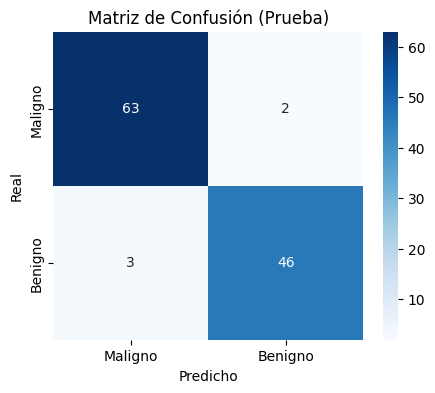

In [37]:
y_pred = clf.predict(X_test) # Realiza predicciones con el modelo entrenado usando los datos de test (20%)
conf_matrix = confusion_matrix(y_test, y_pred) # Genera la matriz de confusión comparando valores reales vs predicciones
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno']) # Crear mapa de calor
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Prueba)")
plt.show()

In [38]:
print(y_pred[1])
print(y_test[1])

0
0


In [39]:
print(y_pred[20])
print(y_test[20])

0
0


In [40]:
print(y_pred[-1])
print(y_test[-1])

0
0


In [41]:
accuracy = accuracy_score(y_test, y_pred) # Calcula la exactitud del modelo comparando las etiquetas reales con las predichas
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names.tolist()))

Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        65
           M       0.96      0.94      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



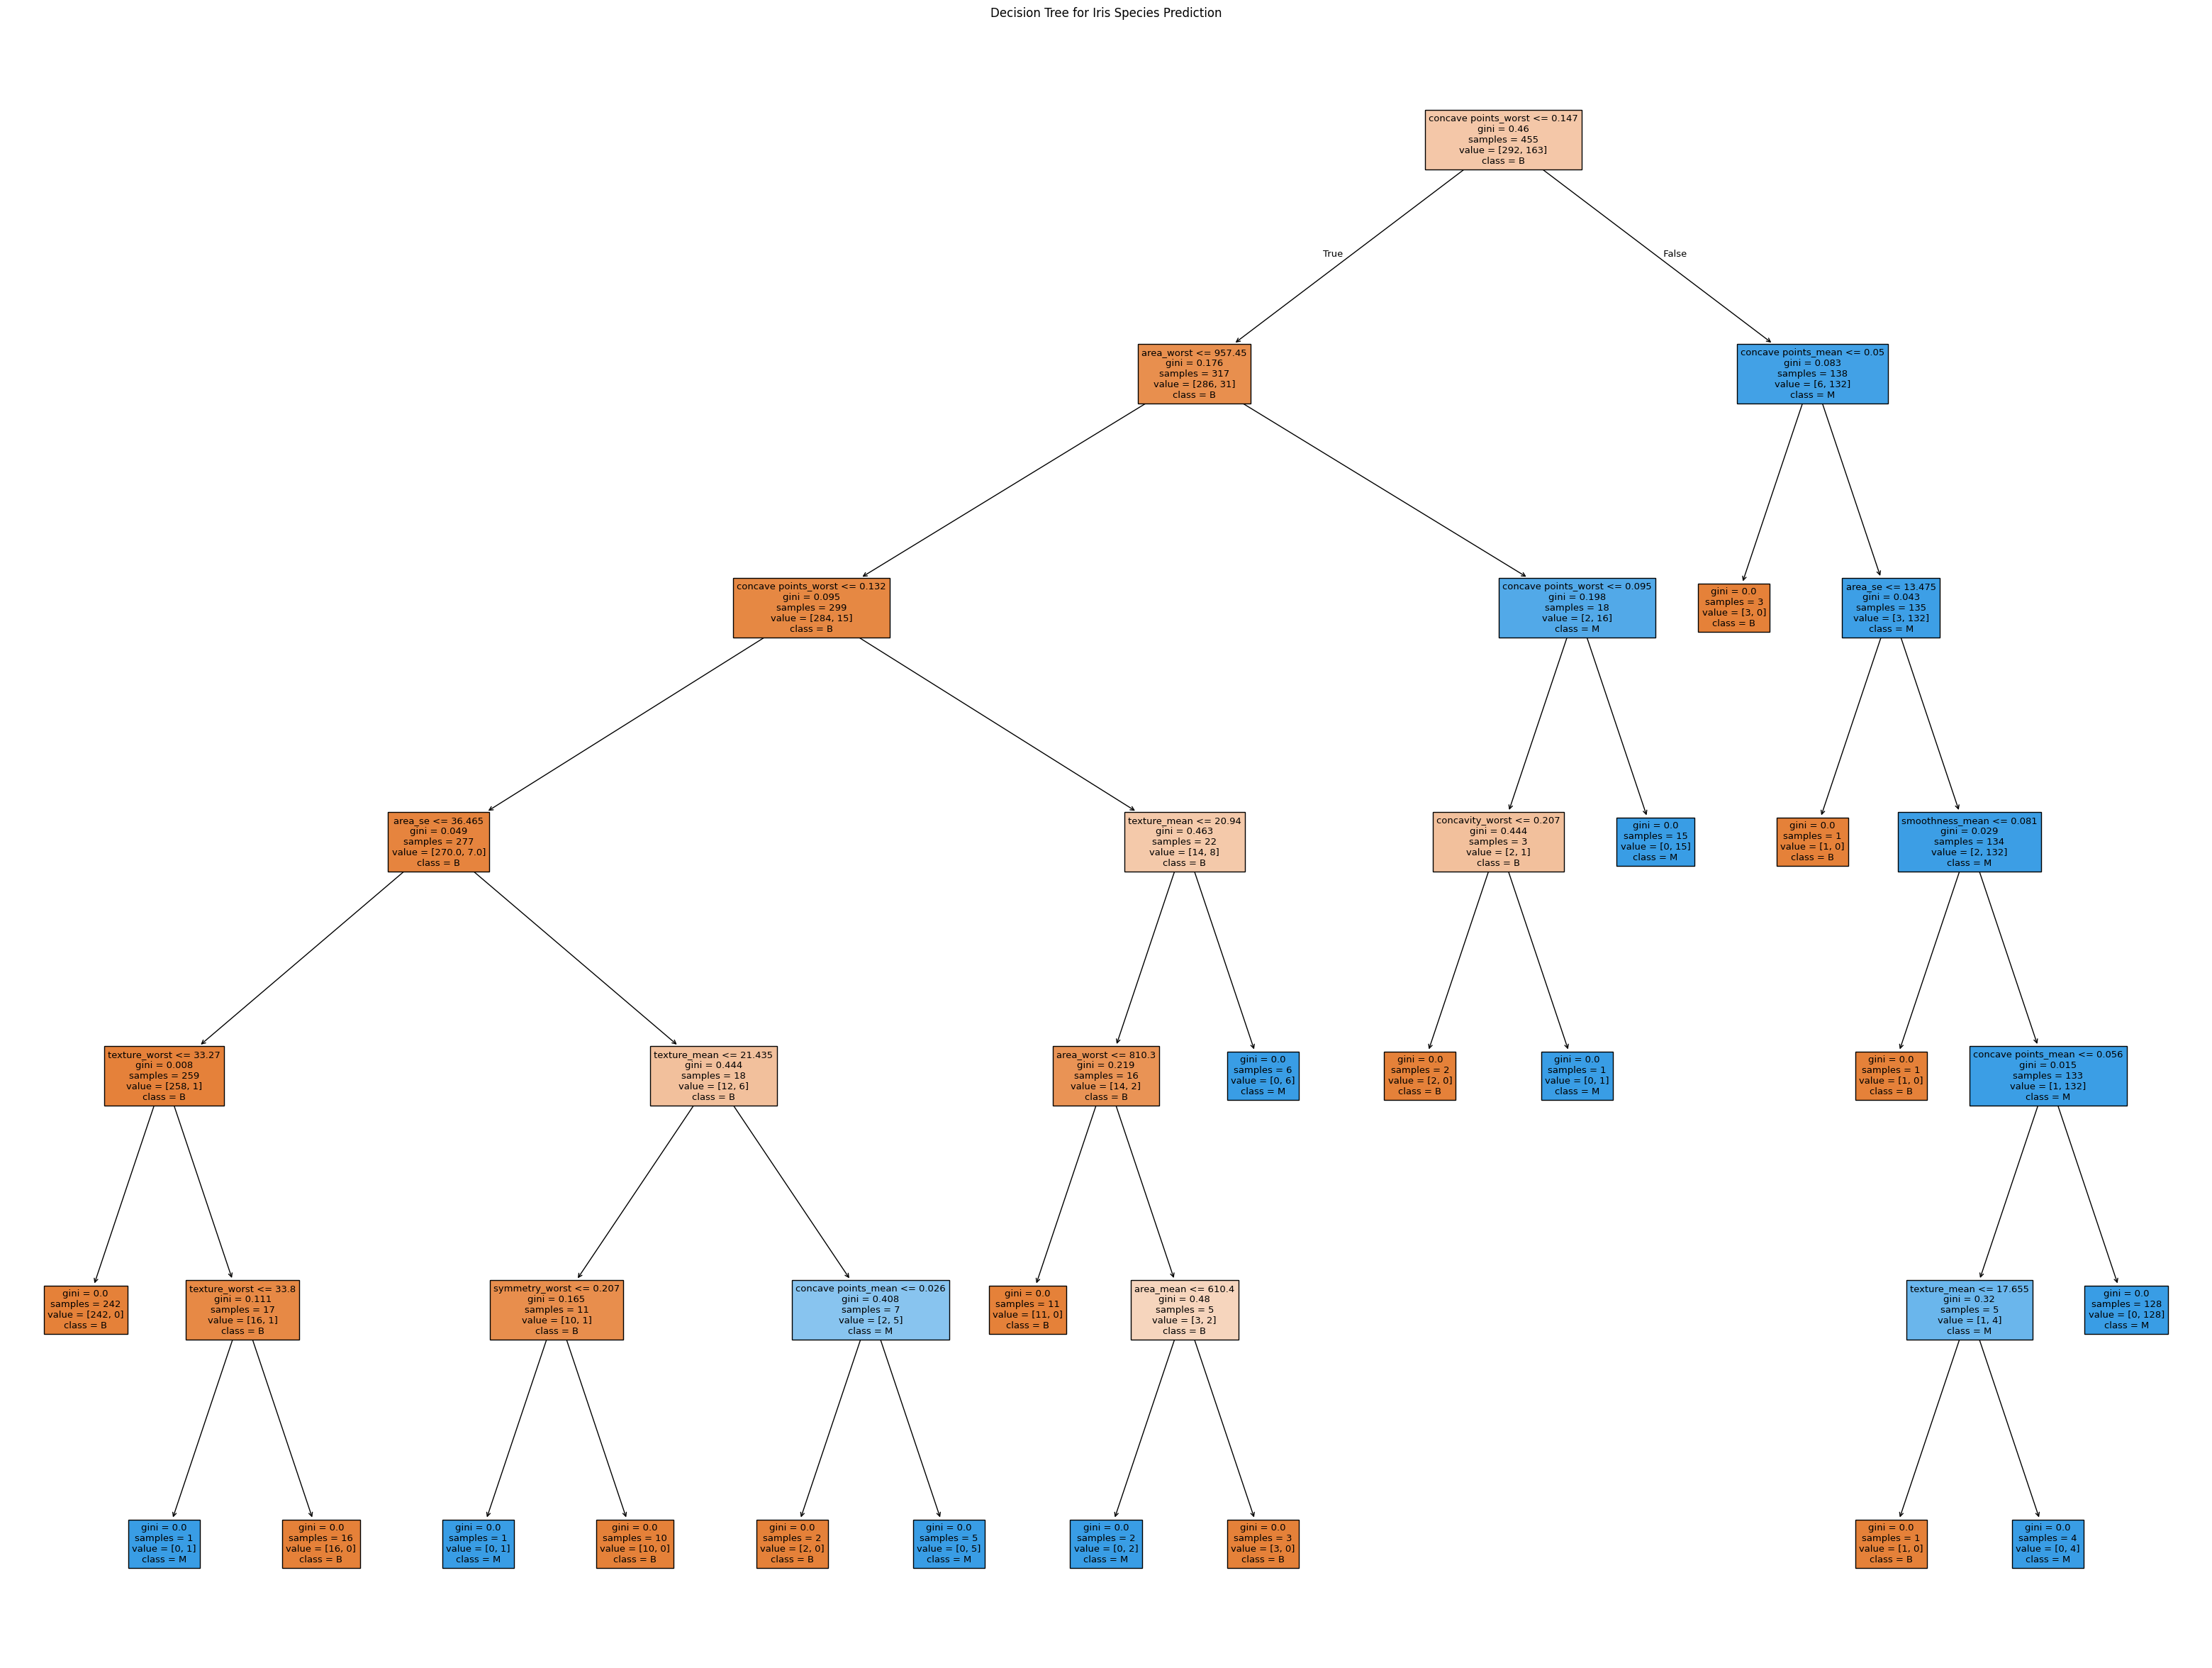

In [42]:
plt.figure(figsize=(40, 30))  # Incrementar el tamaño para mejor resolución
feature_names = data.drop(columns=['id', 'diagnosis']).columns.tolist()
tree.plot_tree(clf, feature_names=feature_names, filled=True, class_names=target_names) # Crear árbol de decisiones
plt.title("Decision Tree for Iris Species Prediction")
plt.savefig("decision_tree.png", dpi=300)  # Incrementar el DPI para mejor resolución
plt.show()